# **Universidad ICESI**

*Milton Orlando Sarria Paja*

## **Considera los siguientes casos**

📖 **Caso 1: Horas de Estudio y Calificaciones**

📂 **Datos:** Registro de estudiantes con sus horas de estudio y calificaciones: score_updated.csv

El conjunto de datos contiene dos columnas: el número de horas que un estudiante estudió y las calificaciones que obtuvo. Podemos aplicar una regresión lineal simple para predecir las calificaciones del estudiante dado su número de horas de estudio.


📖 **Caso 2: Temperatura y Ventas de Helado**

📂 **Datos:** Temperatura diaria y ventas de helado en una heladería: Ice_cream_selling_data.csv

Ice Cream Selling dataset: El conjunto de datos muestra la relación entre la temperatura y las ventas de helados. Sirve como un ejemplo práctico para comprender e implementar la regresión polinómica, una técnica poderosa para modelar relaciones no lineales en los datos.

📖 **Caso 3: Niveles de Colesterol**

📂 **Datos:** dataset de enfermedades cardíacas: dataset_2190_cholesterol.csv

El dataset de enfermedades cardíacas contiene información médica recopilada en cuatro centros hospitalarios. Incluye 76 atributos, aunque solo 14 son comúnmente utilizados, como colesterol (chol), presión arterial (trestbps), frecuencia cardíaca (thalach), y tipo de dolor torácico (cp). La variable objetivo (num) indica la presencia de enfermedad cardíaca en distintos niveles. Este conjunto de datos se ha empleado ampliamente en estudios de aprendizaje automático para el diagnóstico de enfermedades cardíacas.

---

# **Actividad: Análisis y Modelado de Datos en Diferentes Contextos**

### **Objetivo General**
Los estudiantes explorarán distintos conjuntos de datos para verificar supuestos, ajustar modelos de regresión y evaluar su desempeño mediante métricas estadísticas.

---

## **Caso 1: Horas de Estudio y Calificaciones (Regresión Lineal Simple)**

📂 **Dataset:** `score_updated.csv`  
📊 **Relación esperada:** Lineal  

### **Parte 1: Verificación de Supuestos**
1. Cargar los datos y visualizar la relación entre horas de estudio y calificaciones mediante un **gráfico de dispersión**.  
2. Evaluar la distribución de las variables usando histogramas y boxplots.  
---


In [6]:
# ! pip install pandas
# ! pip install statsmodels
# ! pip install matplotlib
# ! pip install scipy

In [7]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [31]:
scoreDf = pd.read_csv("score_updated.csv")
scoreDf.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<Axes: xlabel='Hours', ylabel='Scores'>

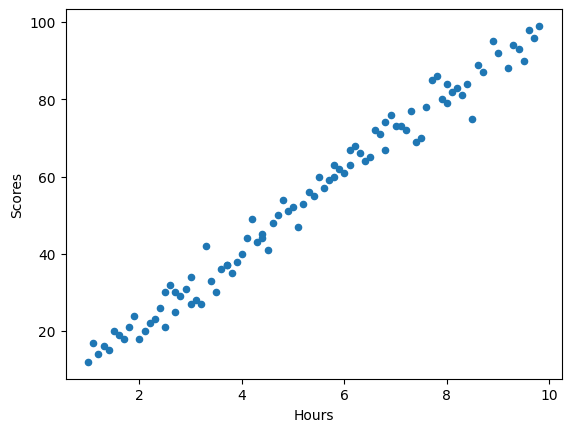

In [9]:
scoreDf.plot(x='Hours', y='Scores', kind='scatter')

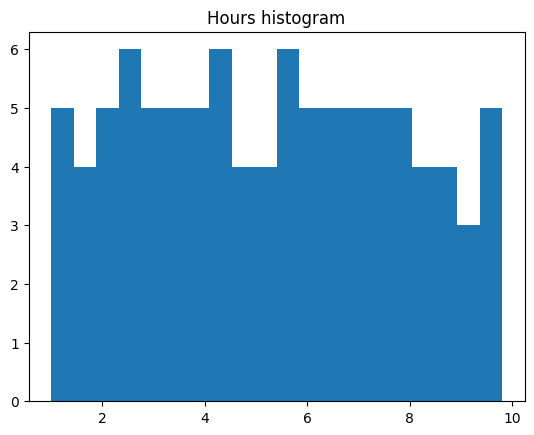

In [10]:
plt.hist(data=scoreDf, x='Hours', bins=20)
plt.title("Hours histogram")
plt.show()

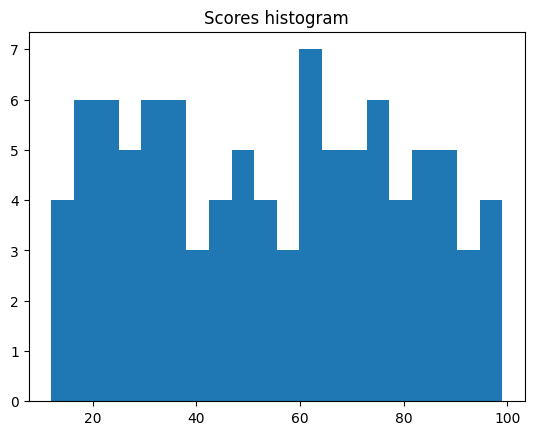

In [11]:
plt.hist(data=scoreDf, x='Scores', bins=20)
plt.title("Scores histogram")
plt.show()

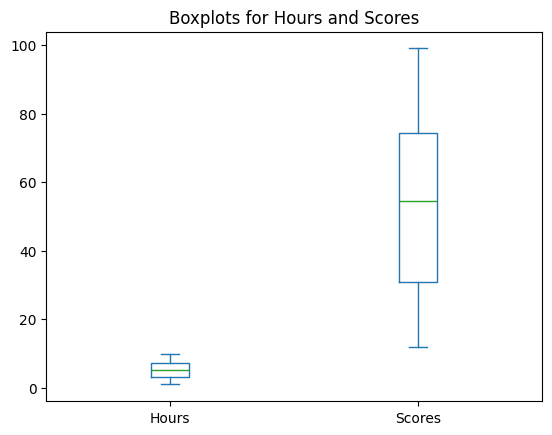

In [12]:
scoreDf.plot(kind='box')
plt.title("Boxplots for Hours and Scores")
plt.show()

### **Parte 2: Ajuste del Modelo y Evaluación**
1. Ajustar una **regresión lineal** usando `statsmodels`.  
2. Interpretar los coeficientes del modelo y el **summary()**:
   - ¿Cuál es el valor de **R²**? ¿Qué indica sobre el modelo?  
   - ¿Los coeficientes son estadísticamente significativos?  
   - ¿Cómo interpretamos el coeficiente de la variable "horas de estudio"?  

3. Verificar los supuestos de la regresión lineal:
   - **Linealidad:** ¿La relación entre las variables parece una línea recta?  
   - **Normalidad de los residuos:** Graficar un **histograma de los residuos** y realizar un **test de normalidad**.  
   - **Homoscedasticidad:** Generar un **gráfico de residuos vs valores ajustados**.  
4. Responder: ¿Es apropiado un modelo de regresión lineal en este caso? ¿Por qué?  


---


In [13]:
hours2 = sm.add_constant(scoreDf['Hours'])
model_sm = sm.OLS(scoreDf['Scores'], hours2)
results_sm = model_sm.fit()

In [14]:
results_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     4951.
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           4.18e-83
Time:                        11:21:40   Log-Likelihood:                -253.62
No. Observations:                  96   AIC:                             511.2
Df Residuals:                      94   BIC:                             516.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8636      0.820      2.273      0.025       0.236       3.492
Hours          9.9013      0.141     70.363      0.000       9.622      10.181
==============================================================================
Omnibus:                        2.355   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.308   Jarque-Bera (JB):                1.746
Skew:                          -0.291   Prob(JB):                        0.418
Kurtosis:                       3.313   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2
R² = 0.981, esto indica que el modelo explica un 98% de la varianza observada.

Los coeficientes si son significativos, ya que el valor p tanto para el intercepto como la pendiente es menor a 0.05

El coeficiente de horas de estudio significa que por cada hora adicional que se dedique un estudiante su puntaje va a mejorar en 9.9 puntos.

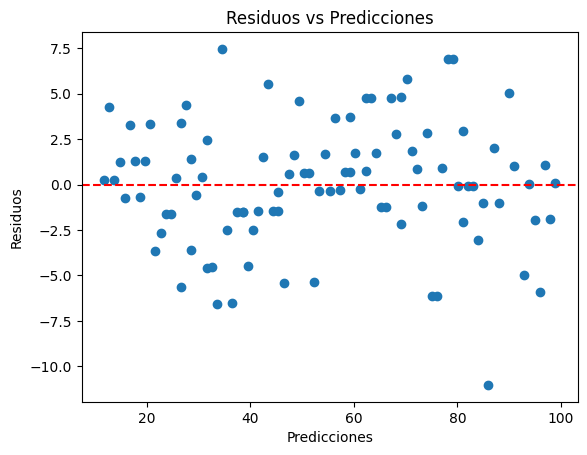

In [15]:
yPred =results_sm.predict(hours2)
residues = results_sm.resid

plt.scatter(yPred, residues)
plt.axhline(0, color='red', linestyle='--')  # Línea horizontal en 0
plt.title('Residuos vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

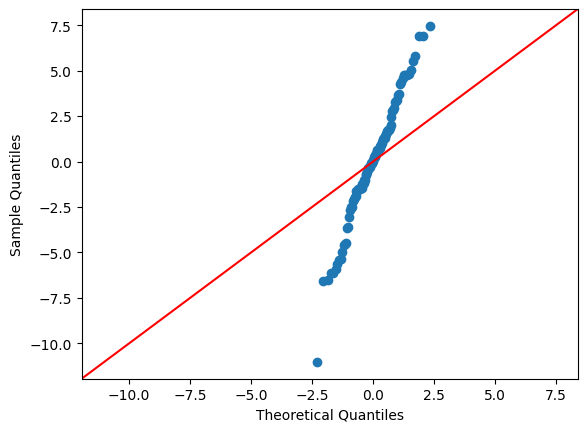

In [16]:
sm.qqplot(residues, line ='45')
plt.show()

<Axes: ylabel='Frequency'>

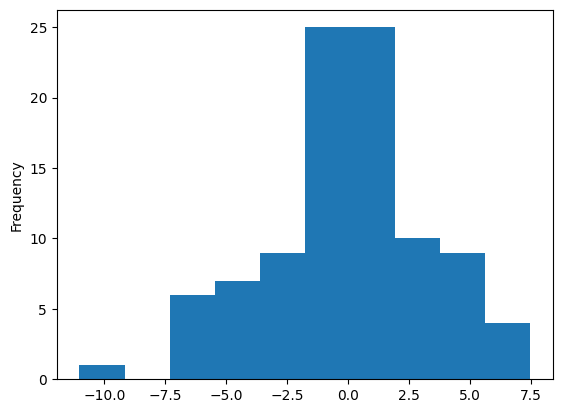

In [17]:
residues.plot(kind='hist')

In [18]:
#Shapiro wilk normality test
stat, p_value = stats.shapiro(residues)
print('Shapiro-Wilk:', stat)
print('Valor p:', p_value)

Shapiro-Wilk: 0.9834730350056647
Valor p: 0.27005254147580293


## 3

Aunque si aparenta ver una relación lineal. Si se observa el hay una linea bastante equitativa de como se distribuyen los residuos. 

El gráfico de los residuos muestra que si hay un tipo de comportamiento normal, eso se puede asegurar con la prueba de shapiro wilk y el valor P entra dentro del rango de normalidad.

En el caso de homocedasticidad, la gráfica de residuos vs predicciones (valores ajustados) muestra que los residuos tienen errores aleatorios a lo largo de todos los valores predichos (no hay un patrón que se vea fácilmente en la gráfica)


### **Parte 3: Evaluación del Modelo con RMSE**
1. Calcular el **RMSE**.  
2. Reflexionar:  
   - ¿El RMSE es bajo o alto?  
   - ¿Qué indica esto sobre la precisión del modelo?  
   - ¿Cómo podríamos mejorar la predicción?  

---


In [19]:
mse = np.mean(residues**2)
print(f'MSE (Mean Squared Error): {mse}')

MSE (Mean Squared Error): 11.54021082950942


In [20]:
rmse = np.sqrt(mse)
print(f'RMSE (Root Mean Squared Error): {rmse}')

RMSE (Root Mean Squared Error): 3.3970885813457117


# 3
El RMSE es bajo teniendo en cuenta que los puntajes van desde 0 a 100, y en este caso solo tiene 3.3 puntos. 

Esto signficia que el modelo es bastante preciso ya que el error general en los datos en general es relativamente bajo.

La predicción se podría mejor teniendo más o mejores datos. También se ve que la distribución de los datos es un poco muy homogenea, que no está mal en sí, pero teniendo más datos podría normalizarse más los datos.

In [ ]:
# ! pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 9.0 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.1 MB 9.5 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 10.3 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 9.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
#Using sklearn metrics
from sklearn.metrics import mean_squared_error

In [24]:
mse_sklearn = mean_squared_error(scoreDf['Scores'], yPred)
print(f'MSE (Mean Squared Error) con sklearn: {mse_sklearn}')

# Calcular RMSE
rmse_sklearn = np.sqrt(mse_sklearn)
print(f'RMSE (Root Mean Squared Error) con sklearn: {rmse_sklearn}')

MSE (Mean Squared Error) con sklearn: 11.54021082950942
RMSE (Root Mean Squared Error) con sklearn: 3.3970885813457117


### **Parte 4: Introducción de Valores Atípicos**  

1. **Modificar el dataset manualmente**, agregando al menos **tres puntos extremos**, por ejemplo:  
   - Un estudiante con **50 horas de estudio** pero una calificación de **30**.  
   - Un estudiante con **0 horas de estudio** pero una calificación de **95**.  
   - Un estudiante con **100 horas de estudio** y una calificación de **10**.  
2. **Visualizar nuevamente los datos** con los valores atípicos en un gráfico de dispersión.  




In [41]:
dfOutliers = scoreDf.copy()

newOutliers = pd.DataFrame([
    {'Hours':50, 'Scores':30},
    {'Hours':0, 'Scores':95},
    {'Hours':100, 'Scores':10}
])

#pd.DataFrame expects a list of dictionaries

dfOutliers = pd.concat([dfOutliers, newOutliers], ignore_index=True)

dfOutliers.tail()

,Hours,Scores
94,3.7,37
95,8.0,84
96,50.0,30
97,0.0,95
98,100.0,10


<Axes: xlabel='Hours', ylabel='Scores'>

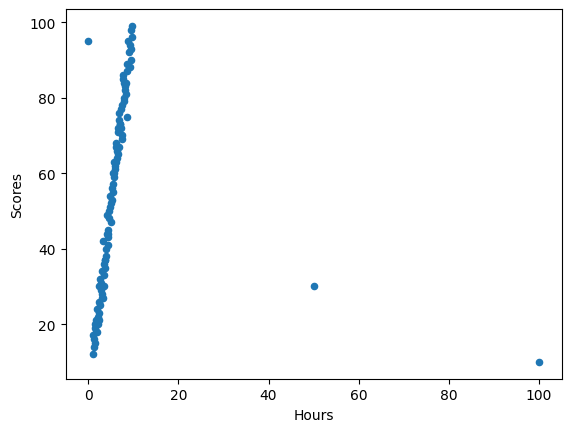

In [42]:
dfOutliers.plot(x='Hours', y='Scores', kind='scatter')

---

### **Parte 5: Reevaluación del Modelo**  

1. **Volver a ajustar la regresión lineal** con los datos modificados.  
2. **Comparar los coeficientes y métricas** antes y después de agregar los valores atípicos:  
   - ¿Cómo cambiaron los coeficientes de la regresión?  
   - ¿El valor de R² aumentó o disminuyó? ¿Por qué?  
   - ¿Cómo cambió el RMSE?  
   - ¿Qué efectos observas en la línea de regresión en la gráfica?  
3. **Reflexionar**:  
   - ¿Cómo afectan los valores atípicos la precisión del modelo?  
   - ¿Qué podríamos hacer para mitigar su impacto?  
   - ¿Cuándo es recomendable eliminarlos y cuándo es mejor dejarlos en el análisis?  


In [43]:
hoursOut = sm.add_constant(dfOutliers['Hours'])
modelOut = sm.OLS(dfOutliers['Scores'], hoursOut)
resultsOut = modelOut.fit()

In [45]:
resultsOut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.02941
Date:                Sun, 23 Feb 2025   Prob (F-statistic):              0.864
Time:                        11:41:47   Log-Likelihood:                -460.52
No. Observations:                  99   AIC:                             925.0
Df Residuals:                      97   BIC:                             930.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.4752      3.024     17.682      0.000      47.473      59.477
Hours          0.0411      0.240      0.171      0.864      -0.435       0.517
==============================================================================
Omnibus:                       36.810   Durbin-Watson:                   2.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.194
Skew:                           0.041   Prob(JB):                       0.0452
Kurtosis:                       1.777   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
yPredOut =resultsOut.predict(hoursOut)
residuesOut = resultsOut.resid
mseOut = np.mean(residuesOut**2)
print(f'MSE (Mean Squared Error): {mseOut}')
rmseOut = np.sqrt(mseOut)
print(f'RMSE (Root Mean Squared Error): {rmseOut}')

MSE (Mean Squared Error): 642.6807714440793
RMSE (Root Mean Squared Error): 25.351149312093906


# 5

Los coeficientes cambiaron mucho. El intercepto incrementó a 53.48, mientras la pendiente de hora bajó a 0.04. El R^2 bajó hasta 0. El RMSE subió hasta 25 unidades. línea de regresión con los datos atípicos hizo que se moviera mucho y que ya se alejara mucho del mayor grupo de datos, lo que hace que el modelo sea muy malo.

Los valores atípicos reducen la precisión del modelo. Para mitigarlos se puede borrarlos o tratarlos, pero depende del caso. En mayoría de los casos es mejor reemplazarlos por la media u otros valores que estén dentro de un rango más aceptable. Es mejor eliminarlos cuando el resultado es muy malo teniendo en cuenta algun error crazo en la experimentación. En cualquier otro caso, es mejor mantener el dato.

## **Caso 2: Temperatura y Ventas de Helado (Relación No Lineal)**

📂 **Dataset:** `Ice_cream_selling_data.csv`  
📊 **Relación esperada:** No lineal  

### **Parte 1: Exploración de Datos y Supuestos**
1. Cargar los datos y visualizar la relación mediante un **gráfico de dispersión**.  
2. Evaluar la distribución de las variables usando histogramas y boxplots.
3. Responder: ¿Consideras que el modelo lineal es adecuado en este caso?  

---




### **Parte 2: Ajuste del Modelo y Evaluación**
1. Ajustar una **regresión lineal** usando `statsmodels`.  
2. Interpretar los coeficientes del modelo y el **summary()**:
   - ¿Cuál es el valor de **R²**? ¿Qué indica sobre el modelo?  
   - ¿Los coeficientes son estadísticamente significativos?  
   - ¿Cómo interpretamos el coeficiente de la variable "temperatura"?

3. Verificar los supuestos de la regresión lineal:
   - **Linealidad:** ¿La relación entre las variables parece una línea recta?  
   - **Normalidad de los residuos:** Graficar un **histograma de los residuos** y realizar un **test de normalidad**.  
   - **Homoscedasticidad:** Generar un **gráfico de residuos vs valores ajustados**.  


---

### **Parte 3: Evaluación del Modelo con RMSE**
1. Calcular el **RMSE**.  
2. Reflexionar:  
   - ¿Que podemos concluir al usar solamente el RMSE como medida de desempeño?  
   - ¿Es posible hacer ajustes para mejorar el modelo?  

---



## **Caso 3: Análisis de Enfermedades Cardíacas (Selección de Variables y Comparación de Modelos)**

📂 **Dataset:** `dataset_2190_cholesterol.csv`  
📊 **Objetivo:** Identificar variables clave y construir modelos predictivos  

### **Parte 1: Identificación de Variables**
1. Cargar el dataset y explorar sus columnas.  
2. Identificar la **variable objetivo** (num: presencia de enfermedad cardíaca).  
3. Calcular la **correlación** de todas las variables con "num" y ordenarlas de mayor a menor.  

---


### **Parte 2: Selección de Variables y Modelado**
1. Seleccionar las **tres variables con mayor correlación** con "num".  
2. Ajustar **tres modelos de regresión lineal** (uno para cada variable independiente).  
3. Evaluar los coeficientes y métricas del summary():
   - **R² ajustado**  
   - **Significancia de los coeficientes**  
     


---

### **Parte 3: Comparación y Conclusiones**
1. Comparar los modelos en términos de **desempeño predictivo**.  
2. Reflexionar:  
   - ¿Cuál de las tres variables tiene mayor poder predictivo?  
   - ¿Se podría mejorar el modelo combinando variables?  
   - ¿Qué conclusiones podemos extraer sobre el colesterol y las enfermedades cardíacas?  




---

## **Entrega y Discusión**
- Los estudiantes discutiran en la ultima parte de la clase sus análisis e interpretación de resultados y conclusiones.  
- Se discutirá en clase cómo mejorar los modelos y qué otras técnicas podrían aplicarse.  

---